# ARIMA FOR AMAZON SPOT PRICE PREDICTION

### IMPORT ALL HEADER FILES

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import matplotlib.dates as d
from statsmodels.tsa.stattools import adfuller,acf,pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA, ARMA
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

### IMPORT DATA

In [2]:
data = pd.read_csv("Dataset/US/us-east-1.csv", usecols=(0,2,4), parse_dates=['datetime'], 
                   index_col=['datetime'])
#data.columns = ['datetime', 'os', 'price']

In [3]:
data.head()

,os,price
datetime,,
2017-05-08 21:38:41,SUSE Linux,0.2770
2017-05-08 21:38:41,Linux/UNIX,0.1770
2017-05-08 21:38:37,SUSE Linux,0.4061
2017-05-08 21:38:37,Linux/UNIX,0.3061
2017-05-08 21:38:37,SUSE Linux,0.8234


In [4]:
data.dtypes

os        object
price    float64
dtype: object

###Segregate date based on OS type

In [5]:
data_win = data.loc[data.iloc[:,0] == "Windows"]
data_unix = data.loc[data.iloc[:,0] == "Linux/UNIX"]
data_linux = data.loc[data.iloc[:,0] == "SUSE Linux"]

###Windows plot

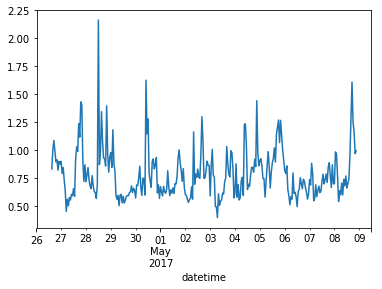

In [6]:
data_win.price.resample('1H').mean().plot()

###Linux plot

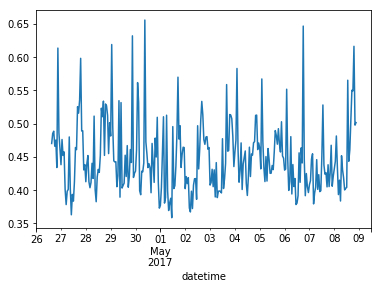

In [7]:
data_linux.price.resample('1H').mean().plot()

###Unix plot

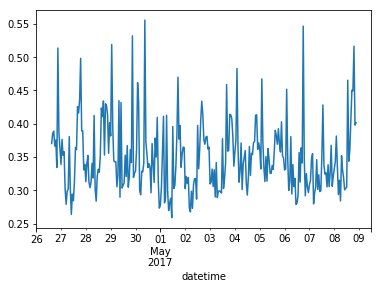

In [8]:
data_unix.price.resample('1H').mean().plot()

###Resample each dataset with 1 hour

In [9]:
win_sample = data_win.price.resample('1H').mean()
lin_sample = data_linux.price.resample('1H').mean()
uni_sample = data_unix.price.resample('1H').mean()



###Check Stationarity

In [10]:
def stationary(dataframe):
    
    # Determine Rolling Stats #
    roll_mean = dataframe.rolling(window=3, center= False ).mean()
    roll_std = dataframe.rolling(window=3, center= False).std()
    
    # Plot rolling statas #
    original = plt.plot(dataframe, label = 'original')
    mean = plt.plot(roll_mean, color = 'red', label = 'roll_mean')
    std = plt.plot(roll_std, color = 'black', label = 'roll_std')
    plt.legend(loc = 'best')
    
    # Dicky Fuller test for stationarity #
    print("Results of Dickey-Fuller Test -----"+dataframe.name )
    dickey_Fuller = adfuller(dataframe, autolag='AIC')
    dfresults = pd.Series(dickey_Fuller[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dickey_Fuller[4].items():
        dfresults['Critical Value (%s)'%key] = value
    print (dfresults)
    return

Results of Dickey-Fuller Test -----price
Test Statistic                -6.762117e+00
p-value                        2.775263e-09
#Lags Used                     1.000000e+00
Number of Observations Used    2.930000e+02
Critical Value (1%)           -3.452867e+00
Critical Value (5%)           -2.871455e+00
Critical Value (10%)          -2.572053e+00
dtype: float64


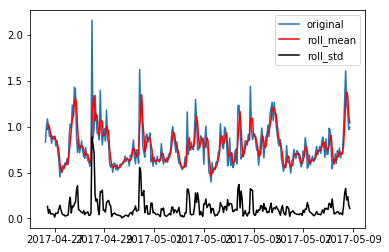

In [11]:
stationary(win_sample)

Results of Dickey-Fuller Test -----price
Test Statistic                -8.411058e+00
p-value                        2.103301e-13
#Lags Used                     1.000000e+00
Number of Observations Used    2.930000e+02
Critical Value (1%)           -3.452867e+00
Critical Value (5%)           -2.871455e+00
Critical Value (10%)          -2.572053e+00
dtype: float64


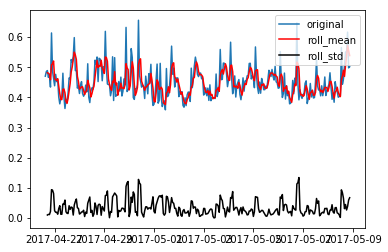

In [12]:
stationary(lin_sample)

Results of Dickey-Fuller Test -----price
Test Statistic                -8.409375e+00
p-value                        2.124242e-13
#Lags Used                     1.000000e+00
Number of Observations Used    2.930000e+02
Critical Value (1%)           -3.452867e+00
Critical Value (5%)           -2.871455e+00
Critical Value (10%)          -2.572053e+00
dtype: float64


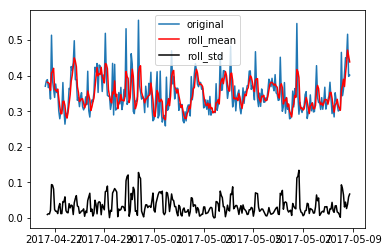

In [13]:
stationary(uni_sample)

###Non- Linear log transformation to check stationarity again

In [14]:
win_log = np.log(win_sample)
lin_log = np.log(lin_sample)
uni_log = np.log(uni_sample)

Results of Dickey-Fuller Test -----price
Test Statistic                -6.162904e+00
p-value                        7.102853e-08
#Lags Used                     1.000000e+00
Number of Observations Used    2.930000e+02
Critical Value (1%)           -3.452867e+00
Critical Value (5%)           -2.871455e+00
Critical Value (10%)          -2.572053e+00
dtype: float64


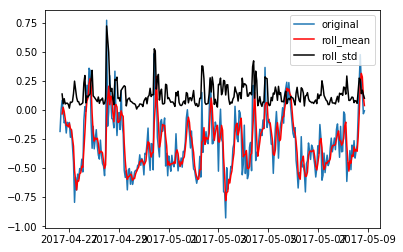

In [15]:
stationary(win_log)

Results of Dickey-Fuller Test -----price
Test Statistic                -8.173760e+00
p-value                        8.484911e-13
#Lags Used                     1.000000e+00
Number of Observations Used    2.930000e+02
Critical Value (1%)           -3.452867e+00
Critical Value (5%)           -2.871455e+00
Critical Value (10%)          -2.572053e+00
dtype: float64


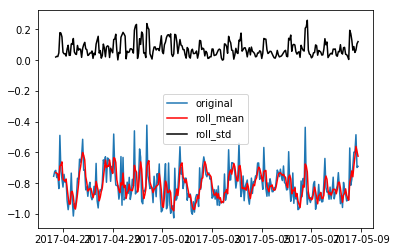

In [16]:
stationary(lin_log)

Results of Dickey-Fuller Test -----price
Test Statistic                -5.942279e+00
p-value                        2.246266e-07
#Lags Used                     8.000000e+00
Number of Observations Used    2.860000e+02
Critical Value (1%)           -3.453423e+00
Critical Value (5%)           -2.871699e+00
Critical Value (10%)          -2.572183e+00
dtype: float64


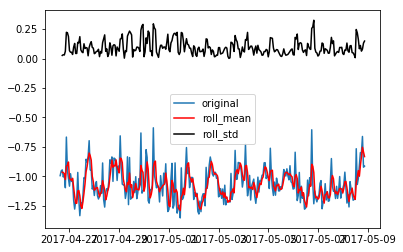

In [17]:
stationary(uni_log)

### Decomposition to remove trend and seasonality for all three dataset

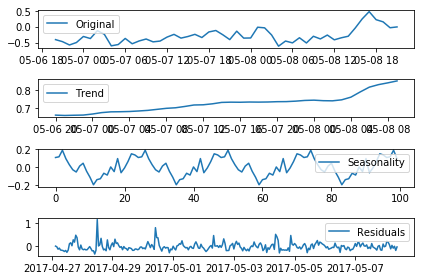

In [18]:
win_decomp = seasonal_decompose(win_sample)

win_trend = win_decomp.trend
win_season = win_decomp.seasonal
win_residual = win_decomp.resid

# Most recent prices for Windows #

win_recent = win_log[-50:]
plt.subplot(411)
plt.plot(win_recent, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(win_trend[-50:], label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(win_season[-100:].values,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(win_residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


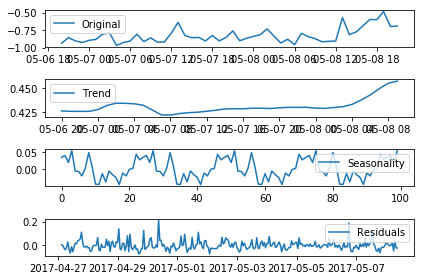

In [19]:
lin_decomp = seasonal_decompose(lin_sample)

lin_trend = lin_decomp.trend
lin_season = lin_decomp.seasonal
lin_residual = lin_decomp.resid

# Most recent prices for Linux #

lin_recent = lin_log[-50:]
plt.subplot(411)
plt.plot(lin_recent, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(lin_trend[-50:], label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(lin_season[-100:].values,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(lin_residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()



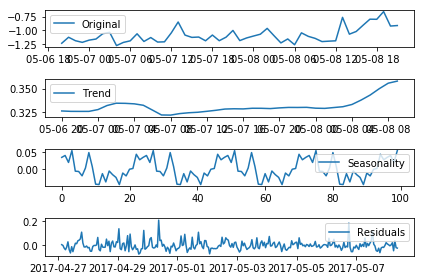

In [20]:
uni_decomp = seasonal_decompose(uni_sample)

uni_trend = uni_decomp.trend
uni_season = uni_decomp.seasonal
uni_residual = uni_decomp.resid

# Most recent prices for Unix #

uni_recent = uni_log[-50:]
plt.subplot(411)
plt.plot(uni_recent, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(uni_trend[-50:], label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(uni_season[-100:].values,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(uni_residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()



###Seasonal differencing for Windows

Results of Dickey-Fuller Test -----price
Test Statistic                  -4.066465
p-value                          0.001100
#Lags Used                       4.000000
Number of Observations Used    215.000000
Critical Value (1%)             -3.461136
Critical Value (5%)             -2.875079
Critical Value (10%)            -2.573986
dtype: float64


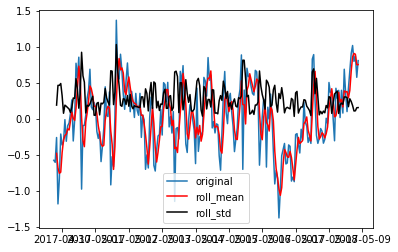

In [25]:
win_diff = win_log - win_log.shift(50)
win_diff.dropna(inplace=True)
win_diff2 = win_diff - win_diff.shift(25)
win_diff2.dropna(inplace=True)
stationary(win_diff2)

###Seasonal differencing for Linux

Results of Dickey-Fuller Test -----price
Test Statistic                  -4.154862
p-value                          0.000785
#Lags Used                      16.000000
Number of Observations Used    238.000000
Critical Value (1%)             -3.458128
Critical Value (5%)             -2.873762
Critical Value (10%)            -2.573283
dtype: float64


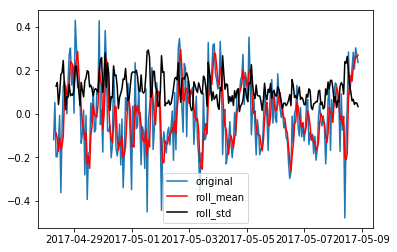

In [26]:
lin_diff = lin_log - lin_log.shift(40)
lin_diff.dropna(inplace=True)
stationary(lin_diff)

###Seasonal differencing for Unix

Results of Dickey-Fuller Test -----price
Test Statistic                  -4.102952
p-value                          0.000958
#Lags Used                      16.000000
Number of Observations Used    238.000000
Critical Value (1%)             -3.458128
Critical Value (5%)             -2.873762
Critical Value (10%)            -2.573283
dtype: float64


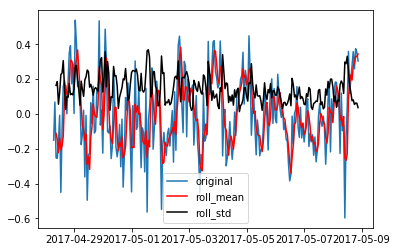

In [27]:
uni_diff = uni_log - uni_log.shift(40)
uni_diff.dropna(inplace=True)
stationary(uni_diff)

###Finding Autoregressive terms and Moving average terms for Windows

Text(0.5, 1.0, 'Partial Autocorrelation Function')

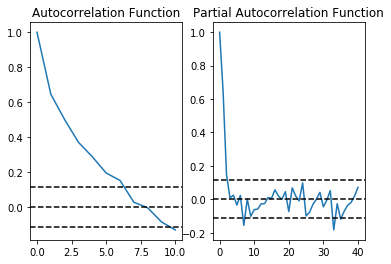

In [28]:
ACF_win = acf(win_log, nlags=10)
PACF_win = pacf(win_log, method='ols')

plt.subplot(121)
plt.plot(ACF_win)
plt.axhline(y=0,linestyle='--',color='black')
plt.axhline(y=-1.96/np.sqrt(len(win_log)),linestyle='--',color='black')
plt.axhline(y=1.96/np.sqrt(len(win_log)),linestyle='--',color='black')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(PACF_win)
plt.axhline(y=0,linestyle='--',color='black')
plt.axhline(y=-1.96/np.sqrt(len(win_log)),linestyle='--',color='black')
plt.axhline(y=1.96/np.sqrt(len(win_log)),linestyle='--',color='black')
plt.title('Partial Autocorrelation Function')

######PACF gives us the value of p which is the autoregressive terms required for ARIMA and is determined when the graph reaches 0 ie. p=6 in our case
######ACF gives us the value of q which is the moving average terms required for ARIMA and is determined when the graph reaches 0 ie. q=6 in our case, 
######But the p and q can cause to cancel out eachother.hence, taking p = 7 and q = 4 
######Since two differencings used after log, d=2

###Finding Autoregressive terms and Moving average terms for Linux

Text(0.5, 1.0, 'Partial Autocorrelation Function')

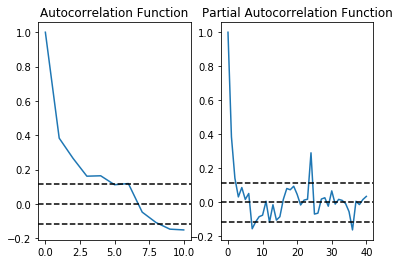

In [29]:
ACF_lin = acf(lin_log, nlags=10)
PACF_lin = pacf(lin_log, method='ols')

plt.subplot(121)
plt.plot(ACF_lin)
plt.axhline(y=0,linestyle='--',color='black')
plt.axhline(y=-1.96/np.sqrt(len(lin_log)),linestyle='--',color='black')
plt.axhline(y=1.96/np.sqrt(len(lin_log)),linestyle='--',color='black')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(PACF_lin)
plt.axhline(y=0,linestyle='--',color='black')
plt.axhline(y=-1.96/np.sqrt(len(lin_log)),linestyle='--',color='black')
plt.axhline(y=1.96/np.sqrt(len(lin_log)),linestyle='--',color='black')
plt.title('Partial Autocorrelation Function')

######PACF gives us the value of p which is the autoregressive terms required for ARIMA and is determined when the graph drops to 0 ie. p=6 in our case
######ACF gives us the value of q which is the moving average terms required for ARIMA and is determined when the graph drops 0 ie. q=6 in our case, 
######But the p and q can cause to cancel out eachother.hence, taking p = 7 and q = 4 
######Since seven differencings used after log, d=7

###Finding Autoregressive terms and Moving average terms for Unix

Text(0.5, 1.0, 'Partial Autocorrelation Function')

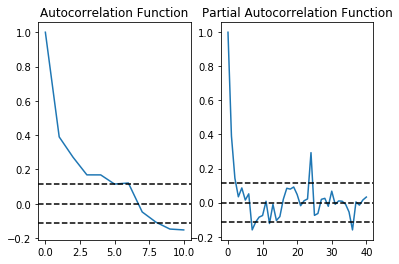

In [30]:
ACF_uni = acf(uni_log, nlags=10)
PACF_uni = pacf(uni_log, method='ols')

plt.subplot(121)
plt.plot(ACF_uni)
plt.axhline(y=0,linestyle='--',color='black')
plt.axhline(y=-1.96/np.sqrt(len(uni_log)),linestyle='--',color='black')
plt.axhline(y=1.96/np.sqrt(len(uni_log)),linestyle='--',color='black')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(PACF_uni)
plt.axhline(y=0,linestyle='--',color='black')
plt.axhline(y=-1.96/np.sqrt(len(uni_log)),linestyle='--',color='black')
plt.axhline(y=1.96/np.sqrt(len(uni_log)),linestyle='--',color='black')
plt.title('Partial Autocorrelation Function')

######PACF gives us the value of p which is the autoregressive terms required for ARIMA and is determined when the graph drops to 0 ie. p=6 in our case
######ACF gives us the value of q which is the moving average terms required for ARIMA and is determined when the graph drops 0 ie. q=6 in our case, 
######But the p and q can cause to cancel out eachother.hence, taking p = 7 and q = 4 
######Since seven differencings used after log, d=7

### Setting up the model - Windows

In [31]:
win_model = ARIMA(win_log,(7,2,4))
result_win = win_model.fit(disp=-1)

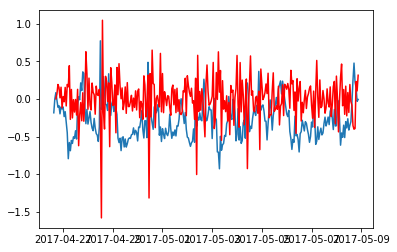

In [32]:
plt.plot(win_log)
plt.plot(result_win.fittedvalues, color = 'red')

In [34]:
result_win.summary()

<table class="simpletable">
<caption>ARIMA Model Results</caption>
<tr>
  <th>Dep. Variable:</th>     <td>D2.price</td>     <th>  No. Observations:  </th>   <td>293</td>  
</tr>
<tr>
  <th>Model:</th>          <td>ARIMA(7, 2, 4)</td>  <th>  Log Likelihood     </th> <td>55.902</td> 
</tr>
<tr>
  <th>Method:</th>             <td>css-mle</td>     <th>  S.D. of innovations</th>  <td>0.196</td> 
</tr>
<tr>
  <th>Date:</th>          <td>Mon, 03 Dec 2018</td> <th>  AIC                </th> <td>-85.804</td>
</tr>
<tr>
  <th>Time:</th>              <td>21:56:16</td>     <th>  BIC                </th> <td>-37.962</td>
</tr>
<tr>
  <th>Sample:</th>           <td>04-26-2017</td>    <th>  HQIC               </th> <td>-66.642</td>
</tr>
<tr>
  <th></th>                 <td>- 05-08-2017</td>   <th>                     </th>    <td> </td>   
</tr>
</table>
<table class="simpletable">
<tr>
         <td></td>           <th>coef</th>     <th>std err</th>      <th>z</th>      <th>P>|z|</th>  <th>[0.025</th>    <th>0.975]</th>  
</tr>
<tr>
  <th>const</th>          <td> 3.423e-05</td> <td> 7.94e-05</td> <td>    0.431</td> <td> 0.667</td> <td>   -0.000</td> <td>    0.000</td>
</tr>
<tr>
  <th>ar.L1.D2.price</th> <td>   -1.8198</td> <td>    0.063</td> <td>  -29.014</td> <td> 0.000</td> <td>   -1.943</td> <td>   -1.697</td>
</tr>
<tr>
  <th>ar.L2.D2.price</th> <td>   -2.1559</td> <td>    0.124</td> <td>  -17.437</td> <td> 0.000</td> <td>   -2.398</td> <td>   -1.914</td>
</tr>
<tr>
  <th>ar.L3.D2.price</th> <td>   -1.8711</td> <td>    0.175</td> <td>  -10.684</td> <td> 0.000</td> <td>   -2.214</td> <td>   -1.528</td>
</tr>
<tr>
  <th>ar.L4.D2.price</th> <td>   -0.8748</td> <td>    0.200</td> <td>   -4.378</td> <td> 0.000</td> <td>   -1.266</td> <td>   -0.483</td>
</tr>
<tr>
  <th>ar.L5.D2.price</th> <td>   -0.4756</td> <td>    0.175</td> <td>   -2.719</td> <td> 0.007</td> <td>   -0.818</td> <td>   -0.133</td>
</tr>
<tr>
  <th>ar.L6.D2.price</th> <td>   -0.2175</td> <td>    0.124</td> <td>   -1.759</td> <td> 0.080</td> <td>   -0.460</td> <td>    0.025</td>
</tr>
<tr>
  <th>ar.L7.D2.price</th> <td>   -0.0763</td> <td>    0.061</td> <td>   -1.247</td> <td> 0.214</td> <td>   -0.196</td> <td>    0.044</td>
</tr>
<tr>
  <th>ma.L1.D2.price</th> <td>    0.4800</td> <td>    0.025</td> <td>   19.069</td> <td> 0.000</td> <td>    0.431</td> <td>    0.529</td>
</tr>
<tr>
  <th>ma.L2.D2.price</th> <td>    0.0097</td> <td>    0.022</td> <td>    0.439</td> <td> 0.661</td> <td>   -0.034</td> <td>    0.053</td>
</tr>
<tr>
  <th>ma.L3.D2.price</th> <td>   -0.5090</td> <td>    0.021</td> <td>  -23.961</td> <td> 0.000</td> <td>   -0.551</td> <td>   -0.467</td>
</tr>
<tr>
  <th>ma.L4.D2.price</th> <td>   -0.9806</td> <td>    0.025</td> <td>  -39.246</td> <td> 0.000</td> <td>   -1.030</td> <td>   -0.932</td>
</tr>
</table>
<table class="simpletable">
<caption>Roots</caption>
<tr>
    <td></td>   <th>            Real</th>  <th>         Imaginary</th> <th>         Modulus</th>  <th>        Frequency</th>
</tr>
<tr>
  <th>AR.1</th> <td>          -0.2495</td> <td>          -0.9916j</td> <td>           1.0224</td> <td>          -0.2892</td>
</tr>
<tr>
  <th>AR.2</th> <td>          -0.2495</td> <td>          +0.9916j</td> <td>           1.0224</td> <td>           0.2892</td>
</tr>
<tr>
  <th>AR.3</th> <td>          -1.0045</td> <td>          -0.0000j</td> <td>           1.0045</td> <td>          -0.5000</td>
</tr>
<tr>
  <th>AR.4</th> <td>           0.7654</td> <td>          -1.6884j</td> <td>           1.8538</td> <td>          -0.1823</td>
</tr>
<tr>
  <th>AR.5</th> <td>           0.7654</td> <td>          +1.6884j</td> <td>           1.8538</td> <td>           0.1823</td>
</tr>
<tr>
  <th>AR.6</th> <td>          -1.4398</td> <td>          -1.2493j</td> <td>           1.9063</td> <td>          -0.3863</td>
</tr>
<tr>
  <th>AR.7</th> <td>          -1.4398</td> <td>          +1.2493j</td> <td>           1.9063</td> <td>           0.3863</td>
</tr>
<tr>
  <th>MA.1</th> <td>       

In [35]:
result_win.resid.describe()

count    293.000000
mean      -0.001545
std        0.199805
min       -0.483928
25%       -0.116775
50%       -0.004688
75%        0.106069
max        1.191863
dtype: float64

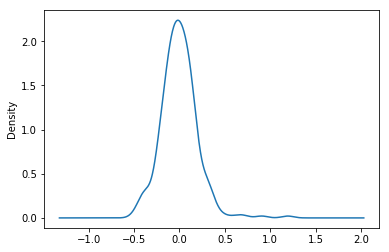

In [36]:
res_residuals = result_win.resid
res_residuals.plot(kind='kde')

In [37]:
pred_diff = pd.Series(result_win.fittedvalues,copy=True)
pred_diff.head()

datetime
2017-04-26 17:00:00    0.000034
2017-04-26 18:00:00    0.062697
2017-04-26 19:00:00    0.191000
2017-04-26 20:00:00    0.153084
2017-04-26 21:00:00    0.013671
Freq: H, dtype: float64

In [38]:
pred_diff_cumsum = pred_diff.cumsum()
pred_diff_log = pd.Series(win_log.iloc[:], index=win_log.index)
pred_diff_log = pred_diff_log.add(pred_diff_cumsum, fill_value=0)

Text(0.5, 1.0, 'RMSE : 0.506915')

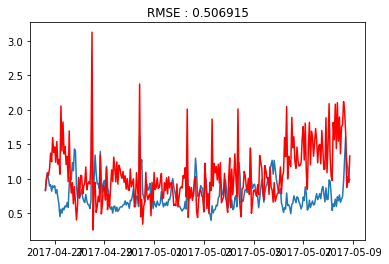

In [39]:
pred_win = np.exp(pred_diff_log)
plt.plot(win_sample)
plt.plot(pred_win, color= 'red')
plt.title('RMSE : %4f'%np.sqrt(sum(((win_sample - pred_win)**2)/len(win_sample))))

###MSE PLOT

In [40]:
mse_win = np.square(win_sample-pred_win)
print(mse_win)

datetime
2017-04-26 15:00:00    0.000000e+00
2017-04-26 16:00:00    0.000000e+00
2017-04-26 17:00:00    1.381913e-09
2017-04-26 18:00:00    4.072409e-03
2017-04-26 19:00:00    6.680822e-02
2017-04-26 20:00:00    2.102351e-01
2017-04-26 21:00:00    1.836175e-01
2017-04-26 22:00:00    4.894150e-01
2017-04-26 23:00:00    2.571084e-01
2017-04-27 00:00:00    3.183491e-01
2017-04-27 01:00:00    2.003055e-01
2017-04-27 02:00:00    4.843874e-01
2017-04-27 03:00:00    2.332693e-01
2017-04-27 04:00:00    4.163554e-01
2017-04-27 05:00:00    3.780467e-01
2017-04-27 06:00:00    2.235605e+00
2017-04-27 07:00:00    8.119695e-01
2017-04-27 08:00:00    1.555776e+00
2017-04-27 09:00:00    6.504599e-01
2017-04-27 10:00:00    7.495200e-01
2017-04-27 11:00:00    3.799636e-01
2017-04-27 12:00:00    4.501841e-01
2017-04-27 13:00:00    1.379409e-01
2017-04-27 14:00:00    6.085000e-01
2017-04-27 15:00:00    2.557028e-05
2017-04-27 16:00:00    3.822736e-02
2017-04-27 17:00:00    8.531456e-02
2017-04-27 18:00:00

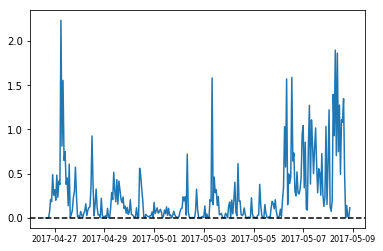

In [41]:
plt.rcParams["xtick.labelsize"] = 8
plt.plot(mse_win)

plt.axhline(y=0,linestyle='--',color='black')

### Setting up the model - Linux

In [43]:
lin_model = ARIMA(lin_log,(6,1,3))
result_lin = lin_model.fit(disp=0)

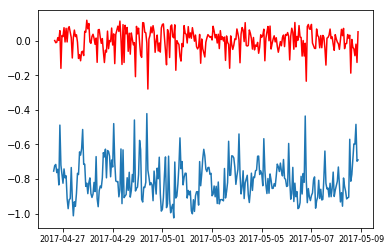

In [44]:
plt.plot(lin_log)
plt.plot(result_lin.fittedvalues, color = 'red')

In [45]:
result_lin.summary()

<table class="simpletable">
<caption>ARIMA Model Results</caption>
<tr>
  <th>Dep. Variable:</th>      <td>D.price</td>     <th>  No. Observations:  </th>    <td>294</td>  
</tr>
<tr>
  <th>Model:</th>          <td>ARIMA(6, 1, 3)</td>  <th>  Log Likelihood     </th>  <td>246.163</td>
</tr>
<tr>
  <th>Method:</th>             <td>css-mle</td>     <th>  S.D. of innovations</th>   <td>0.105</td> 
</tr>
<tr>
  <th>Date:</th>          <td>Mon, 03 Dec 2018</td> <th>  AIC                </th> <td>-470.326</td>
</tr>
<tr>
  <th>Time:</th>              <td>21:56:41</td>     <th>  BIC                </th> <td>-429.807</td>
</tr>
<tr>
  <th>Sample:</th>           <td>04-26-2017</td>    <th>  HQIC               </th> <td>-454.099</td>
</tr>
<tr>
  <th></th>                 <td>- 05-08-2017</td>   <th>                     </th>     <td> </td>   
</tr>
</table>
<table class="simpletable">
<tr>
        <td></td>           <th>coef</th>     <th>std err</th>      <th>z</th>      <th>P>|z|</th>  <th>[0.025</th>    <th>0.975]</th>  
</tr>
<tr>
  <th>const</th>         <td>    0.0004</td> <td>    0.002</td> <td>    0.163</td> <td> 0.871</td> <td>   -0.004</td> <td>    0.005</td>
</tr>
<tr>
  <th>ar.L1.D.price</th> <td>   -0.7658</td> <td>    1.135</td> <td>   -0.674</td> <td> 0.501</td> <td>   -2.991</td> <td>    1.460</td>
</tr>
<tr>
  <th>ar.L2.D.price</th> <td>   -0.6831</td> <td>    0.922</td> <td>   -0.741</td> <td> 0.459</td> <td>   -2.490</td> <td>    1.124</td>
</tr>
<tr>
  <th>ar.L3.D.price</th> <td>   -0.5675</td> <td>    0.819</td> <td>   -0.693</td> <td> 0.489</td> <td>   -2.173</td> <td>    1.038</td>
</tr>
<tr>
  <th>ar.L4.D.price</th> <td>   -0.3490</td> <td>    0.591</td> <td>   -0.591</td> <td> 0.555</td> <td>   -1.506</td> <td>    0.809</td>
</tr>
<tr>
  <th>ar.L5.D.price</th> <td>   -0.2165</td> <td>    0.381</td> <td>   -0.568</td> <td> 0.570</td> <td>   -0.963</td> <td>    0.530</td>
</tr>
<tr>
  <th>ar.L6.D.price</th> <td>    0.0006</td> <td>    0.242</td> <td>    0.002</td> <td> 0.998</td> <td>   -0.474</td> <td>    0.475</td>
</tr>
<tr>
  <th>ma.L1.D.price</th> <td>    0.1814</td> <td>    1.134</td> <td>    0.160</td> <td> 0.873</td> <td>   -2.041</td> <td>    2.404</td>
</tr>
<tr>
  <th>ma.L2.D.price</th> <td>    0.1762</td> <td>    0.385</td> <td>    0.458</td> <td> 0.647</td> <td>   -0.578</td> <td>    0.930</td>
</tr>
<tr>
  <th>ma.L3.D.price</th> <td>    0.0664</td> <td>    0.361</td> <td>    0.184</td> <td> 0.854</td> <td>   -0.640</td> <td>    0.773</td>
</tr>
</table>
<table class="simpletable">
<caption>Roots</caption>
<tr>
    <td></td>   <th>            Real</th>  <th>         Imaginary</th> <th>         Modulus</th>  <th>        Frequency</th>
</tr>
<tr>
  <th>AR.1</th> <td>           0.5384</td> <td>          -1.1837j</td> <td>           1.3004</td> <td>          -0.1821</td>
</tr>
<tr>
  <th>AR.2</th> <td>           0.5384</td> <td>          +1.1837j</td> <td>           1.3004</td> <td>           0.1821</td>
</tr>
<tr>
  <th>AR.3</th> <td>          -1.3499</td> <td>          -0.0000j</td> <td>           1.3499</td> <td>          -0.5000</td>
</tr>
<tr>
  <th>AR.4</th> <td>          -0.6693</td> <td>          -1.2519j</td> <td>           1.4195</td> <td>          -0.3281</td>
</tr>
<tr>
  <th>AR.5</th> <td>          -0.6693</td> <td>          +1.2519j</td> <td>           1.4195</td> <td>           0.3281</td>
</tr>
<tr>
  <th>AR.6</th> <td>         394.9510</td> <td>          -0.0000j</td> <td>         394.9510</td> <td>          -0.0000</td>
</tr>
<tr>
  <th>MA.1</th> <td>           0.2949</td> <td>          -2.1348j</td> <td>           2.1551</td> <td>          -0.2282</td>
</tr>
<tr>
  <th>MA.2</th> <td>           0.2949</td> <td>          +2.1348j</td> <td>           2.1551</td> <td>           0.2282</td>
</tr>
<tr>
  <th>MA.3</th> <td>          -3.2430</td> <td>          -0.0000j</td> <td>           3.2430</td> <td>          -0.5000</td>
</tr>
</table>

In [46]:
result_lin.resid.describe()

count    294.000000
mean      -0.000038
std        0.104827
min       -0.211608
25%       -0.070571
50%       -0.016633
75%        0.052425
max        0.411149
dtype: float64

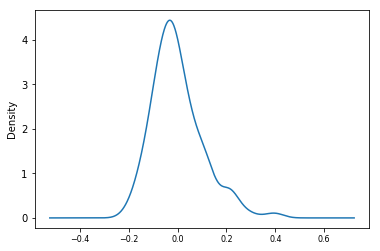

In [47]:
res_residuals_lin = result_lin.resid
res_residuals_lin.plot(kind='kde')

In [48]:
pred_diff_lin = pd.Series(result_lin.fittedvalues,copy=True)
pred_diff_lin.head()

datetime
2017-04-26 16:00:00    0.000397
2017-04-26 17:00:00   -0.012247
2017-04-26 18:00:00   -0.009664
2017-04-26 19:00:00    0.016996
2017-04-26 20:00:00    0.001267
Freq: H, dtype: float64

In [49]:
pred_diff_lin_cumsum = pred_diff_lin.cumsum()
pred_diff_log = pd.Series(lin_log.iloc[:], index=lin_log.index)
pred_diff_log = pred_diff_log.add(pred_diff_lin_cumsum, fill_value=0)

Text(0.5, 1.0, 'RMSE : 0.151723')

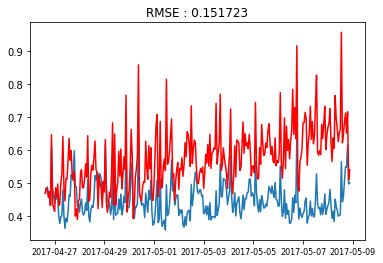

In [50]:
pred_lin = np.exp(pred_diff_log)
plt.plot(lin_sample)
plt.plot(pred_lin, color= 'red')
plt.title('RMSE : %4f'%np.sqrt(sum(((lin_sample - pred_lin)**2)/len(lin_sample))))

###MSE PLOT

In [51]:
mse_lin = np.square(lin_sample-pred_lin)
print(mse_lin)

datetime
2017-04-26 15:00:00    0.000000e+00
2017-04-26 16:00:00    3.709082e-08
2017-04-26 17:00:00    3.312926e-05
2017-04-26 18:00:00    9.842300e-05
2017-04-26 19:00:00    4.591798e-06
2017-04-26 20:00:00    1.986409e-06
2017-04-26 21:00:00    1.159971e-03
2017-04-26 22:00:00    2.410948e-03
2017-04-26 23:00:00    1.167738e-03
2017-04-27 00:00:00    5.291163e-04
2017-04-27 01:00:00    9.960356e-05
2017-04-27 02:00:00    3.371484e-05
2017-04-27 03:00:00    1.594496e-03
2017-04-27 04:00:00    9.963684e-04
2017-04-27 05:00:00    3.522696e-03
2017-04-27 06:00:00    1.021754e-02
2017-04-27 07:00:00    1.592592e-02
2017-04-27 08:00:00    2.609144e-02
2017-04-27 09:00:00    7.036529e-03
2017-04-27 10:00:00    6.953551e-03
2017-04-27 11:00:00    1.459023e-02
2017-04-27 12:00:00    1.674898e-02
2017-04-27 13:00:00    2.501664e-02
2017-04-27 14:00:00    2.956270e-02
2017-04-27 15:00:00    1.183985e-02
2017-04-27 16:00:00    5.391547e-03
2017-04-27 17:00:00    5.370738e-05
2017-04-27 18:00:00

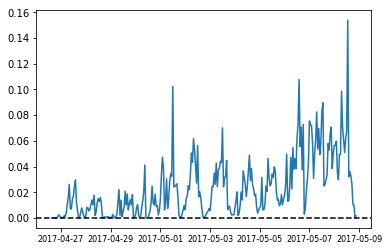

In [52]:
plt.plot(mse_lin)

plt.axhline(y=0,linestyle='--',color='black')

### Setting up the model - Unix

In [53]:
uni_model = ARIMA(uni_log,(6,1,3))
result_uni = uni_model.fit(disp=0)

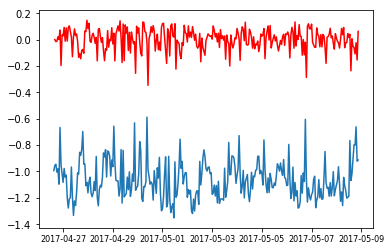

In [54]:
plt.plot(uni_log)
plt.plot(result_uni.fittedvalues, color = 'red')

In [55]:
result_uni.summary()

<table class="simpletable">
<caption>ARIMA Model Results</caption>
<tr>
  <th>Dep. Variable:</th>      <td>D.price</td>     <th>  No. Observations:  </th>    <td>294</td>  
</tr>
<tr>
  <th>Model:</th>          <td>ARIMA(6, 1, 3)</td>  <th>  Log Likelihood     </th>  <td>175.741</td>
</tr>
<tr>
  <th>Method:</th>             <td>css-mle</td>     <th>  S.D. of innovations</th>   <td>0.133</td> 
</tr>
<tr>
  <th>Date:</th>          <td>Mon, 03 Dec 2018</td> <th>  AIC                </th> <td>-329.481</td>
</tr>
<tr>
  <th>Time:</th>              <td>21:57:06</td>     <th>  BIC                </th> <td>-288.962</td>
</tr>
<tr>
  <th>Sample:</th>           <td>04-26-2017</td>    <th>  HQIC               </th> <td>-313.254</td>
</tr>
<tr>
  <th></th>                 <td>- 05-08-2017</td>   <th>                     </th>     <td> </td>   
</tr>
</table>
<table class="simpletable">
<tr>
        <td></td>           <th>coef</th>     <th>std err</th>      <th>z</th>      <th>P>|z|</th>  <th>[0.025</th>    <th>0.975]</th>  
</tr>
<tr>
  <th>const</th>         <td>    0.0005</td> <td>    0.003</td> <td>    0.158</td> <td> 0.875</td> <td>   -0.006</td> <td>    0.007</td>
</tr>
<tr>
  <th>ar.L1.D.price</th> <td>   -0.7534</td> <td>    1.030</td> <td>   -0.732</td> <td> 0.465</td> <td>   -2.772</td> <td>    1.265</td>
</tr>
<tr>
  <th>ar.L2.D.price</th> <td>   -0.6741</td> <td>    0.852</td> <td>   -0.791</td> <td> 0.430</td> <td>   -2.344</td> <td>    0.996</td>
</tr>
<tr>
  <th>ar.L3.D.price</th> <td>   -0.5637</td> <td>    0.756</td> <td>   -0.745</td> <td> 0.457</td> <td>   -2.046</td> <td>    0.919</td>
</tr>
<tr>
  <th>ar.L4.D.price</th> <td>   -0.3430</td> <td>    0.539</td> <td>   -0.636</td> <td> 0.525</td> <td>   -1.400</td> <td>    0.714</td>
</tr>
<tr>
  <th>ar.L5.D.price</th> <td>   -0.2122</td> <td>    0.349</td> <td>   -0.609</td> <td> 0.543</td> <td>   -0.896</td> <td>    0.471</td>
</tr>
<tr>
  <th>ar.L6.D.price</th> <td>    0.0054</td> <td>    0.222</td> <td>    0.025</td> <td> 0.980</td> <td>   -0.430</td> <td>    0.441</td>
</tr>
<tr>
  <th>ma.L1.D.price</th> <td>    0.1737</td> <td>    1.028</td> <td>    0.169</td> <td> 0.866</td> <td>   -1.842</td> <td>    2.189</td>
</tr>
<tr>
  <th>ma.L2.D.price</th> <td>    0.1771</td> <td>    0.377</td> <td>    0.469</td> <td> 0.639</td> <td>   -0.562</td> <td>    0.917</td>
</tr>
<tr>
  <th>ma.L3.D.price</th> <td>    0.0734</td> <td>    0.346</td> <td>    0.212</td> <td> 0.832</td> <td>   -0.604</td> <td>    0.751</td>
</tr>
</table>
<table class="simpletable">
<caption>Roots</caption>
<tr>
    <td></td>   <th>            Real</th>  <th>         Imaginary</th> <th>         Modulus</th>  <th>        Frequency</th>
</tr>
<tr>
  <th>AR.1</th> <td>           0.5331</td> <td>          -1.1808j</td> <td>           1.2955</td> <td>          -0.1825</td>
</tr>
<tr>
  <th>AR.2</th> <td>           0.5331</td> <td>          +1.1808j</td> <td>           1.2955</td> <td>           0.1825</td>
</tr>
<tr>
  <th>AR.3</th> <td>          -1.3409</td> <td>          -0.0000j</td> <td>           1.3409</td> <td>          -0.5000</td>
</tr>
<tr>
  <th>AR.4</th> <td>          -0.6710</td> <td>          -1.2491j</td> <td>           1.4179</td> <td>          -0.3285</td>
</tr>
<tr>
  <th>AR.5</th> <td>          -0.6710</td> <td>          +1.2491j</td> <td>           1.4179</td> <td>           0.3285</td>
</tr>
<tr>
  <th>AR.6</th> <td>          40.5921</td> <td>          -0.0000j</td> <td>          40.5921</td> <td>          -0.0000</td>
</tr>
<tr>
  <th>MA.1</th> <td>           0.3337</td> <td>          -2.0764j</td> <td>           2.1031</td> <td>          -0.2246</td>
</tr>
<tr>
  <th>MA.2</th> <td>           0.3337</td> <td>          +2.0764j</td> <td>           2.1031</td> <td>           0.2246</td>
</tr>
<tr>
  <th>MA.3</th> <td>          -3.0806</td> <td>          -0.0000j</td> <td>           3.0806</td> <td>          -0.5000</td>
</tr>
</table>

In [56]:
result_uni.resid.describe()

count    294.000000
mean      -0.000050
std        0.133201
min       -0.273588
25%       -0.088244
50%       -0.019779
75%        0.067336
max        0.508984
dtype: float64

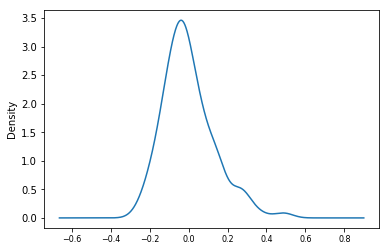

In [57]:
res_residuals_uni = result_uni.resid
res_residuals_uni.plot(kind='kde')

In [58]:
pred_diff_uni = pd.Series(result_uni.fittedvalues,copy=True)
pred_diff_uni.head()

datetime
2017-04-26 16:00:00    0.000494
2017-04-26 17:00:00   -0.015428
2017-04-26 18:00:00   -0.012241
2017-04-26 19:00:00    0.021322
2017-04-26 20:00:00    0.001568
Freq: H, dtype: float64

In [59]:
pred_diff_uni_cumsum = pred_diff_uni.cumsum()
pred_diff_log = pd.Series(uni_log.iloc[:], index=uni_log.index)
pred_diff_log = pred_diff_log.add(pred_diff_uni_cumsum, fill_value=0)

Text(0.5, 1.0, 'RMSE : 0.154324')

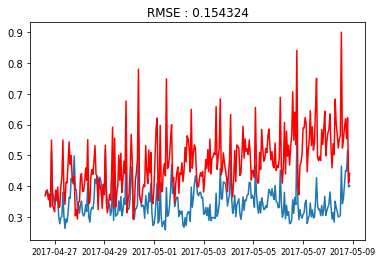

In [60]:
pred_uni = np.exp(pred_diff_log)
plt.plot(uni_sample)
plt.plot(pred_uni, color= 'red')
plt.title('RMSE : %4f'%np.sqrt(sum(((uni_sample - pred_uni)**2)/len(uni_sample))))

###MSE PLOT

In [61]:
mse_uni = np.square(uni_sample-pred_uni)
print(mse_uni)

datetime
2017-04-26 15:00:00    0.000000e+00
2017-04-26 16:00:00    3.630418e-08
2017-04-26 17:00:00    3.319326e-05
2017-04-26 18:00:00    9.640919e-05
2017-04-26 19:00:00    4.796663e-06
2017-04-26 20:00:00    2.040204e-06
2017-04-26 21:00:00    1.318173e-03
2017-04-26 22:00:00    2.154456e-03
2017-04-26 23:00:00    1.023206e-03
2017-04-27 00:00:00    4.418252e-04
2017-04-27 01:00:00    1.201649e-04
2017-04-27 02:00:00    3.437547e-05
2017-04-27 03:00:00    1.569345e-03
2017-04-27 04:00:00    8.789812e-04
2017-04-27 05:00:00    3.185772e-03
2017-04-27 06:00:00    9.997496e-03
2017-04-27 07:00:00    1.585616e-02
2017-04-27 08:00:00    2.874599e-02
2017-04-27 09:00:00    6.650570e-03
2017-04-27 10:00:00    6.066644e-03
2017-04-27 11:00:00    1.421493e-02
2017-04-27 12:00:00    1.618689e-02
2017-04-27 13:00:00    2.569032e-02
2017-04-27 14:00:00    3.221763e-02
2017-04-27 15:00:00    1.216433e-02
2017-04-27 16:00:00    5.535757e-03
2017-04-27 17:00:00    4.284554e-05
2017-04-27 18:00:00

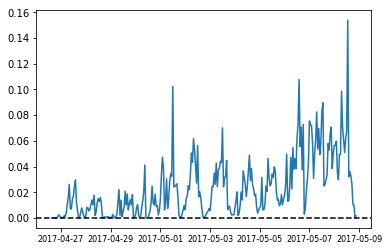

In [62]:
plt.plot(mse_lin)

plt.axhline(y=0,linestyle='--',color='black')